In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time
from dotenv import load_dotenv
load_dotenv('../.env')


True

In [20]:
np.set_printoptions(suppress=True)

In [21]:
reload(h_env)

c:\Machine Learning\Master Tuebingen\Semester_3\RL\.venv\Lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Machine Learning\Master Tuebingen\Semester_3\RL\.venv\Lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'hockey.hockey_env' from 'c:\\Machine Learning\\Master Tuebingen\\Semester_3\\RL\\.venv\\Lib\\site-packages\\hockey\\hockey_env.py'>

# Normal Game Play

In [22]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [23]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

In [24]:
obs, obs_agent2

(array([-3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  3.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.40895176, -0.28853774,  0.        ,
         0.        ,  0.        ,  0.        ]),
 array([-3.        , -0.        ,  0.        , -0.        , -0.        ,
         0.        ,  3.        , -0.        ,  0.        , -0.        ,
        -0.        ,  0.        , -1.40895176,  0.28853774, -0.        ,
        -0.        ,  0.        ,  0.        ]))

one episode with random agents

In [ ]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t:
        print(d)
        print(t)
        print(info)
        break

True
False
{'winner': 0, 'reward_closeness_to_puck': 0.0, 'reward_touch_puck': 0.0, 'reward_puck_direction': -0.00032207977294921875}


: 

In [39]:
# Shape: Box(18,), Type: float32
# [x1, y1, angle1, vx1, vy1, vang1,   # Player 1
#  x2, y2, angle2, vx2, vy2, vang2,   # Player 2
#  xpuck, ypuck, vxpuck, vypuck,      # Puck
#  time_p1_puck, time_p2_puck]        # Optional puck possession

# Shape: Box(3-4,), Type: float32, Range: [-1, 1]
# [linear_force_x, linear_force_y, torque, 
#  optional_shoot_action]

obs, r, d, t, info

(array([ -2.80189896,   1.54519272,   0.20477843,   2.81654239,
         -1.10092056,  -0.10012567,   2.76634312,  -2.55088329,
         -0.21061873,   2.07415271,  -1.26922596,  -0.19451311,
         -4.38904905,  -0.15410924, -18.16182327,  -5.27588034,
          0.        ,   0.        ]),
 -10.133932971095112,
 True,
 False,
 {'winner': -1,
  'reward_closeness_to_puck': -0.13393297109511204,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.002905891723632813})

In [40]:
print("Action Space:", env.action_space)

# Display observation space
print("Observation Space:", env.observation_space)

Action Space: Box(-1.0, 1.0, (8,), float32)
Observation Space: Box(-inf, inf, (18,), float32)


Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [41]:
info, env.get_info_agent_two()

({'winner': -1,
  'reward_closeness_to_puck': -0.13393297109511204,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.002905891723632813},
 {'winner': 1,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.002905891723632813})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [42]:
env.close()

# Train Shooting

In [44]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [59]:
o, info = env.reset()
_ = env.render()

for _ in range(5000):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    # a1 = np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    
    if d: 
        print(_)
        break #or t: break

80


In [60]:
env.close()

# Train DEFENDING

In [62]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_DEFENSE)

In [ ]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t:
        obs, info = env.reset()

In [66]:
env.close()

# Using discrete actions

In [67]:
import random

In [69]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [71]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Hand-crafted Opponent

In [72]:
env = h_env.HockeyEnv()

In [73]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [93]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
    # if d:
    #     obs, info = env.reset()
    #     obs_agent2 = env.obs_agent_two()
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [94]:
obs_buffer.shape

(35, 18)

In [95]:
np.mean(obs_buffer,axis=0)

array([-2.50144865, -0.05099688, -0.40500155, -0.64638826, -0.05367172,
        0.63557869,  1.55484403, -0.11758237, -0.18725576, -0.43181024,
       -0.60356639, -0.26173398,  0.14450572, -0.82432207,  9.45124527,
        1.25625038,  3.        ,  0.        ])

In [96]:
np.std(obs_buffer,axis=0)

array([ 0.62556317,  0.07098662,  0.40018763,  5.50151357,  0.59966484,
        3.42908845,  0.80628664,  0.14631553,  0.07547375,  7.47933229,
        0.75456993,  0.53844761,  2.0929434 ,  0.96306568, 10.28938746,
       14.78950766,  4.98569382,  0.        ])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [97]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [98]:
import pylab as plt

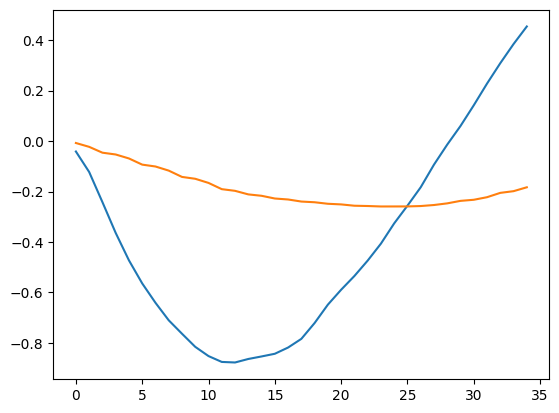

In [99]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

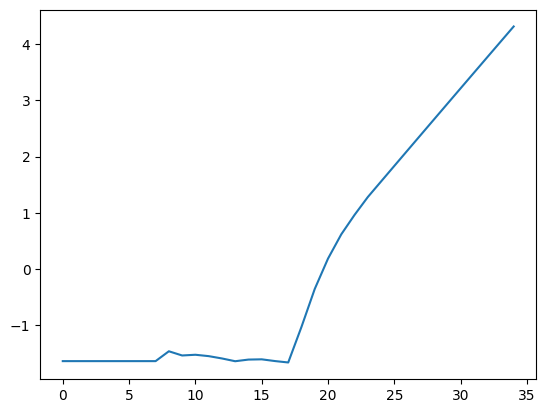

In [100]:
plt.plot(obs_buffer[:,12])

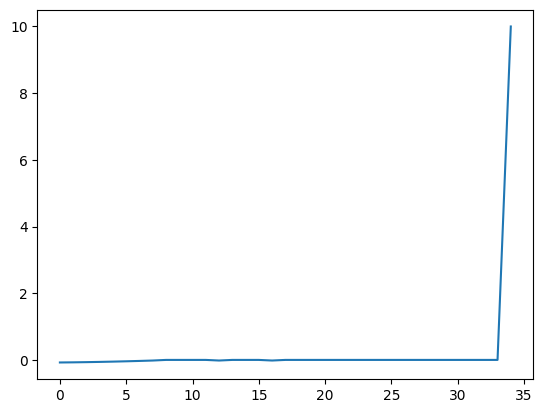

In [101]:
plt.plot(reward_buffer[:])

In [102]:
np.sum(reward_buffer)

np.float64(9.546538692621615)

In [103]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

({'winner': 1,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0021960382080078128},
 {'winner': -1,
  'reward_closeness_to_puck': -0.11004464886508479,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0021960382080078128},
 10.0,
 -10.110044648865085)

In [104]:
env.close()

# Human Opponent

In [119]:
env = h_env.HockeyEnv()

In [106]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [120]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [ ]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(1000):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [122]:
env.close()

# Check side consistency

In [123]:
env = h_env.HockeyEnv()

In [124]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent(weak=False)

In [ ]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
for game in range(1000):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner_buffer.append(info["winner"])
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)

In [ ]:
obs_buffer.shape

In [ ]:
np.mean(obs_buffer,axis=0)

In [ ]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

In [ ]:
winner_buffer

In [ ]:
np.mean(winner_buffer,axis=0)

In [ ]:
np.std(winner_buffer,axis=0)

In [ ]:
np.sum(reward_buffer), np.sum(reward2_buffer)

In [ ]:
env.close()